In [10]:
import sys
import os
import subprocess
import nltk
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
#from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.metrics import mean_squared_error

The information of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   

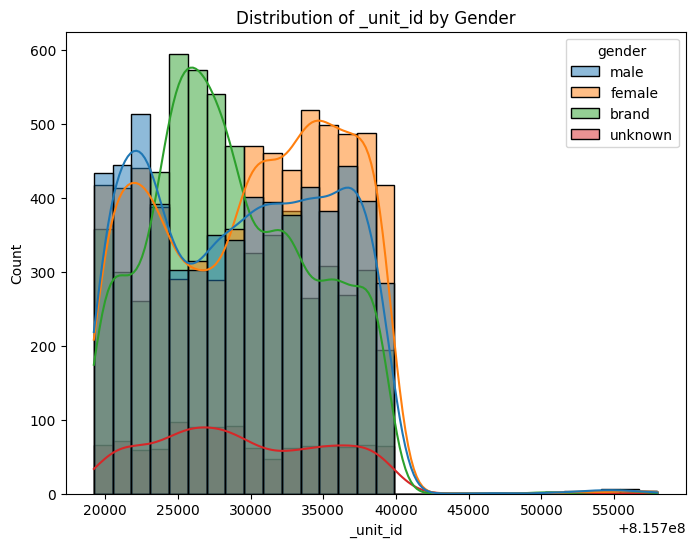

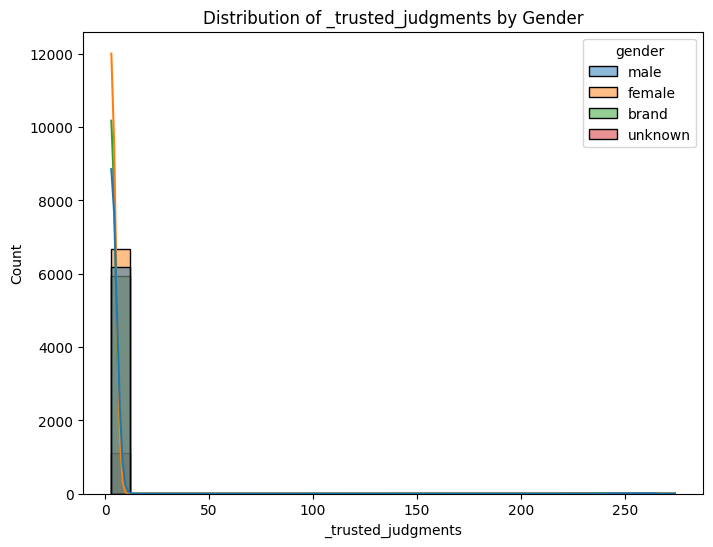

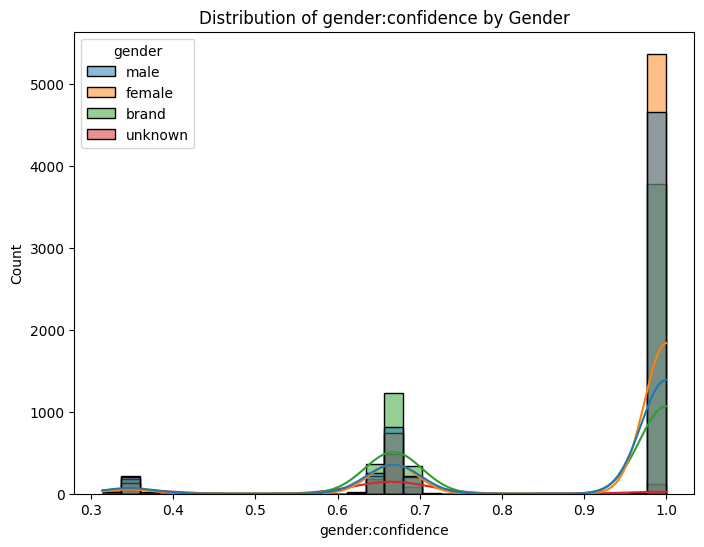

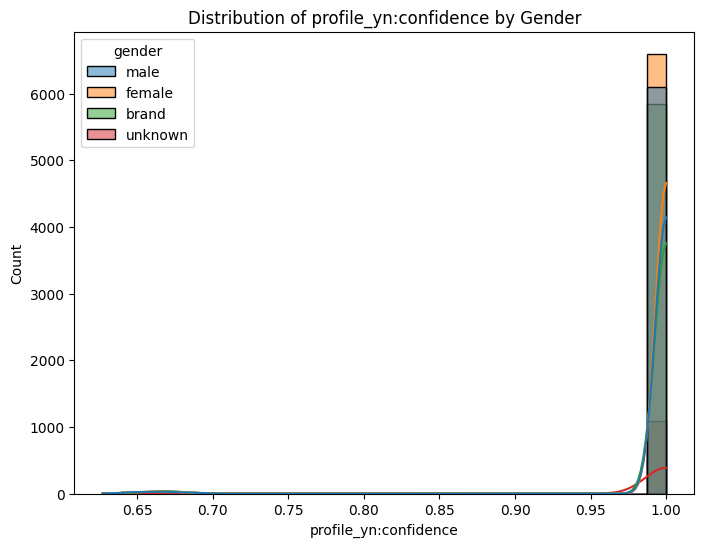

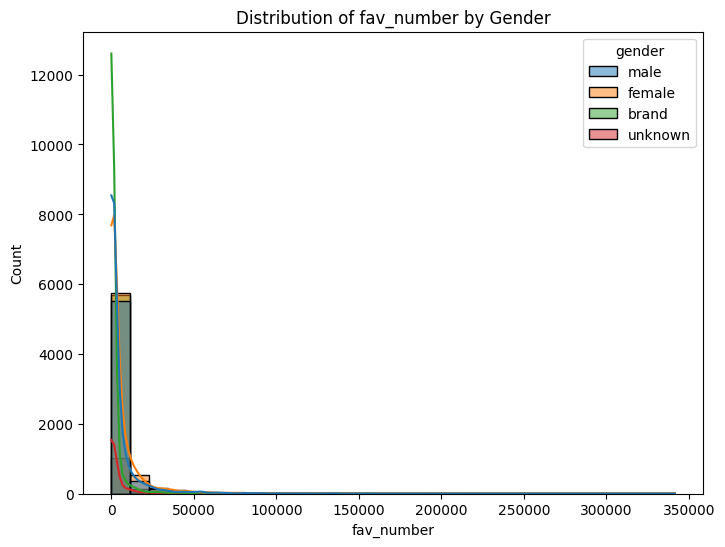

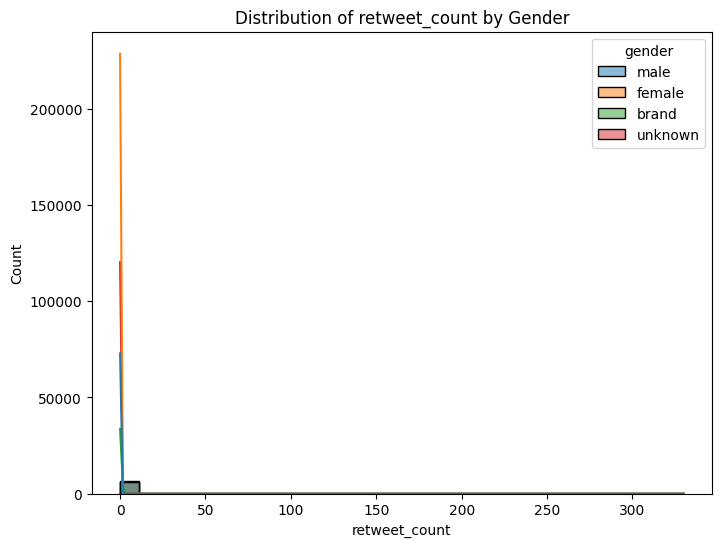

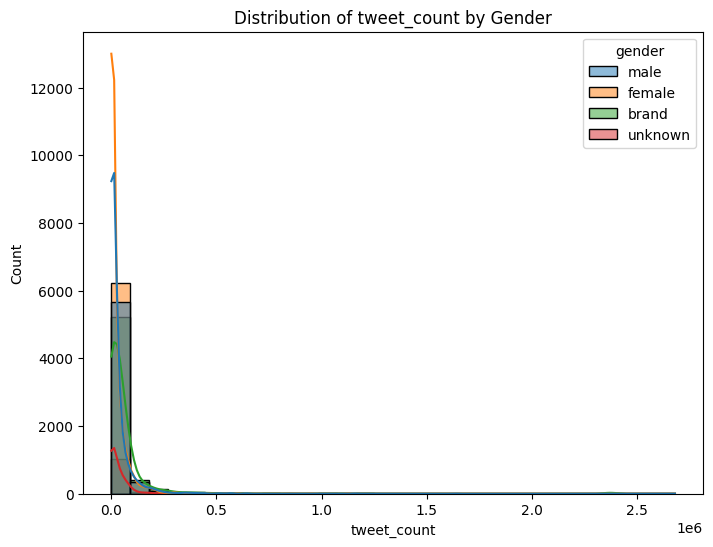

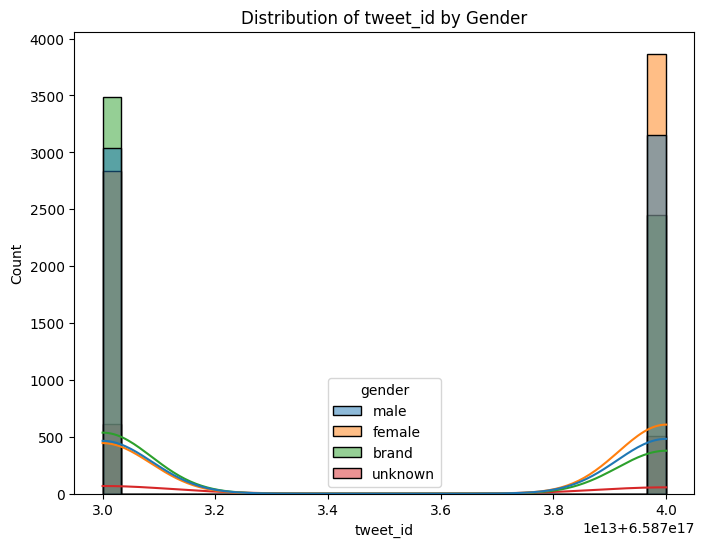

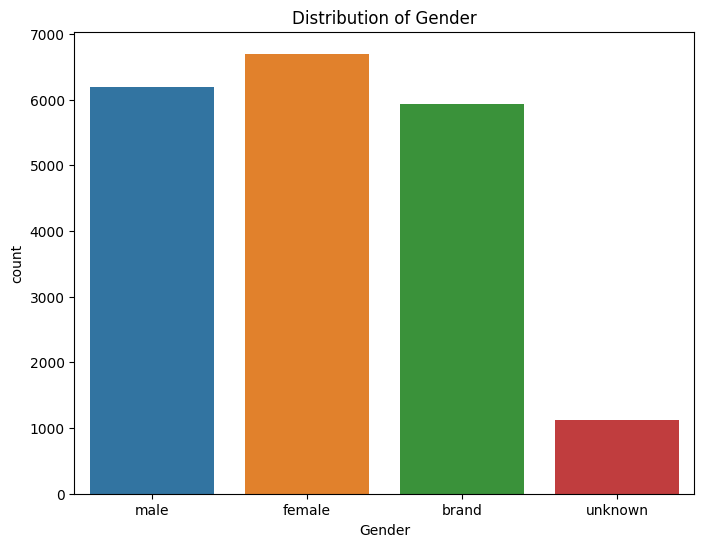

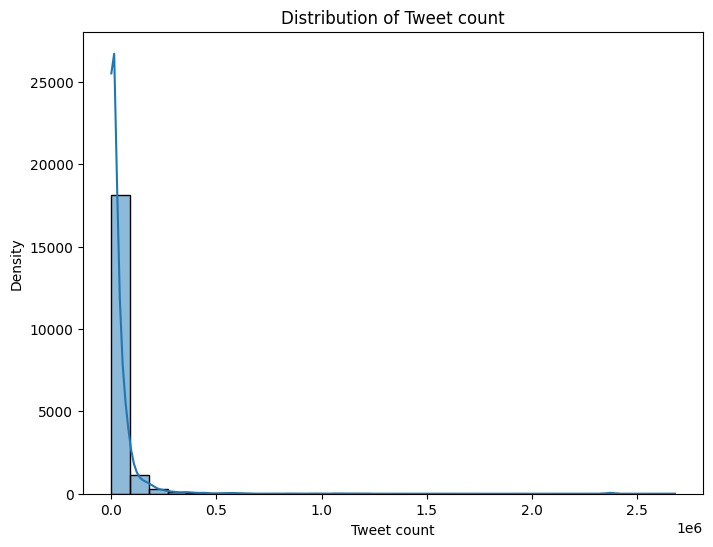

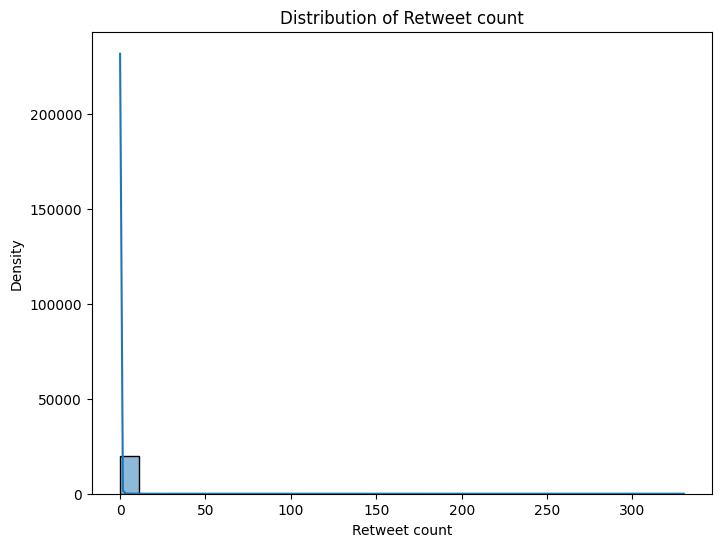

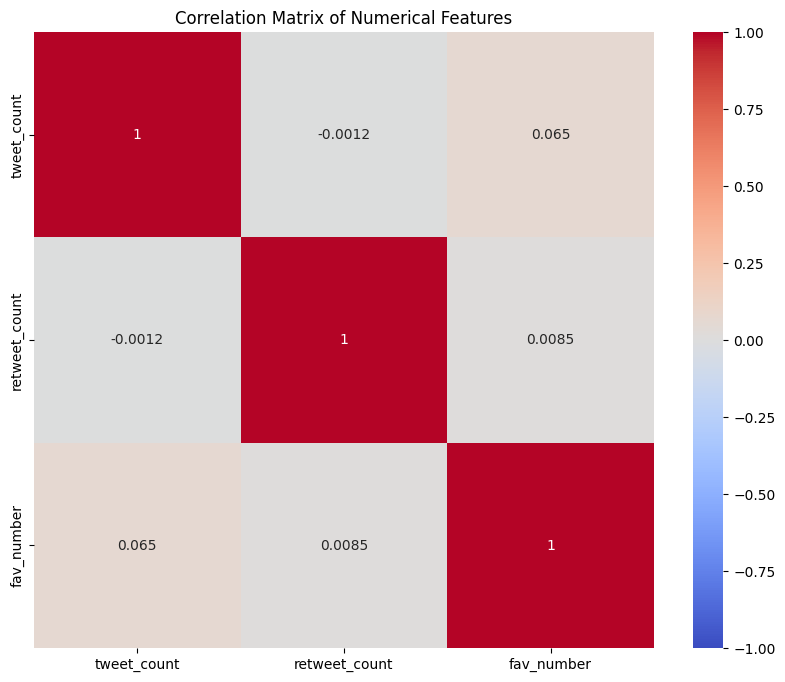

C:\Users\Shahl\AppData\Local\Temp\ipykernel_19484\3406223944.py:86: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['profile_created_year'] = pd.to_datetime(df_cleaned['created']).dt.year
C:\Users\Shahl\AppData\Local\Temp\ipykernel_19484\3406223944.py:87: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['tweet_created_year'] = pd.to_datetime(df_cleaned['tweet_created']).dt.year
C:\Users\Shahl\AppData\Local\Temp\ipykernel_19484\3406223944.py:90: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['created'] = pd.to_datetime(df_cleaned['created'], errors

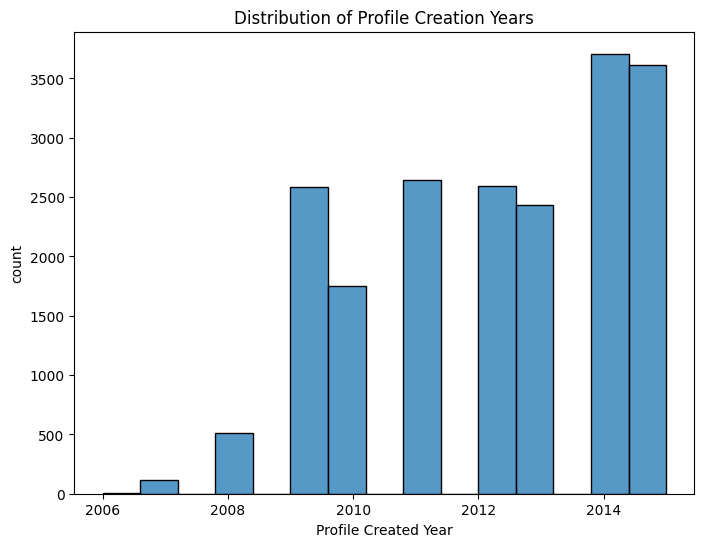

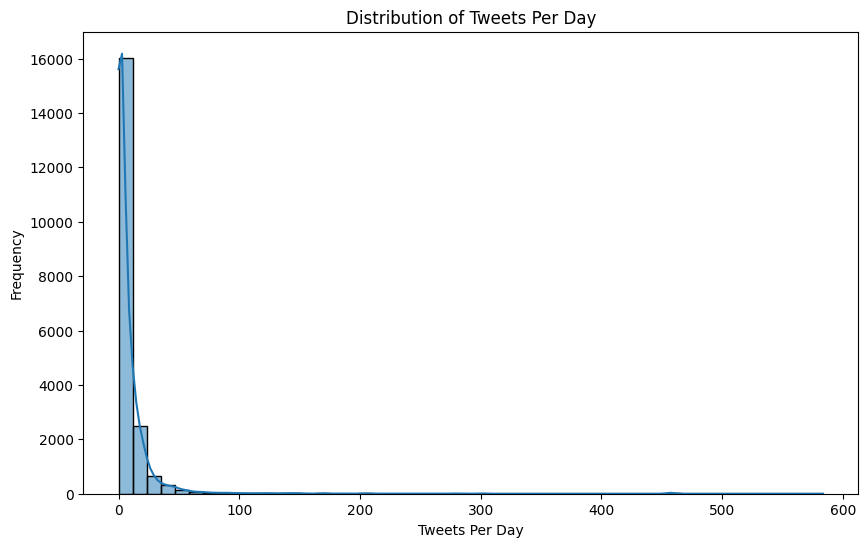

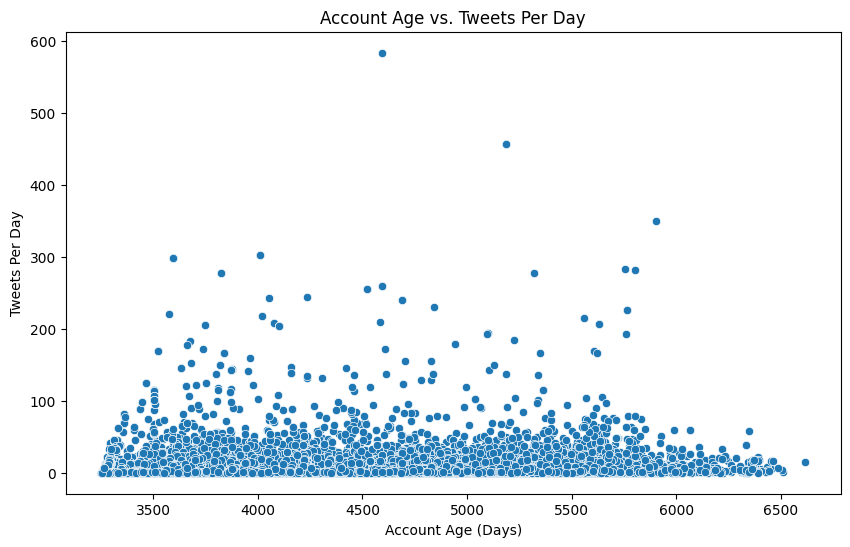

Number of NaN values in 'link_color': 0
Number of NaN values in 'sidebar_color': 0
the number of link color is 2986
the number of side bar color is 559
Number of NaN values in 'link_color': 0
Number of NaN values in 'sidebar_color': 0


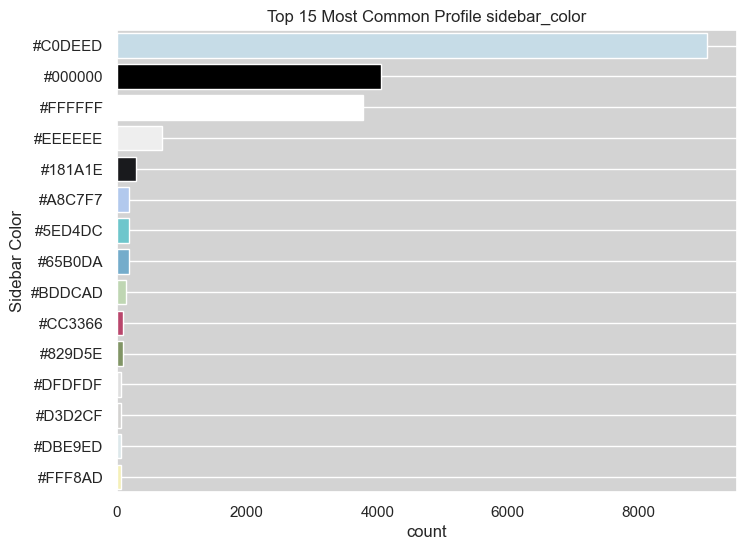

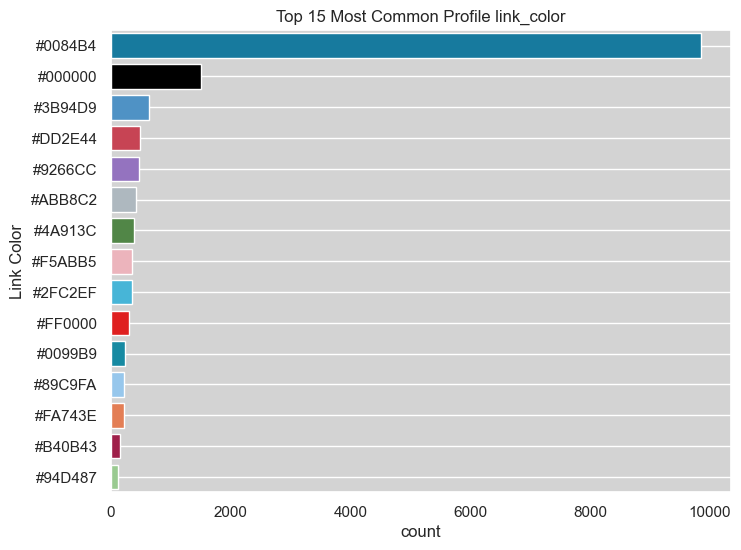

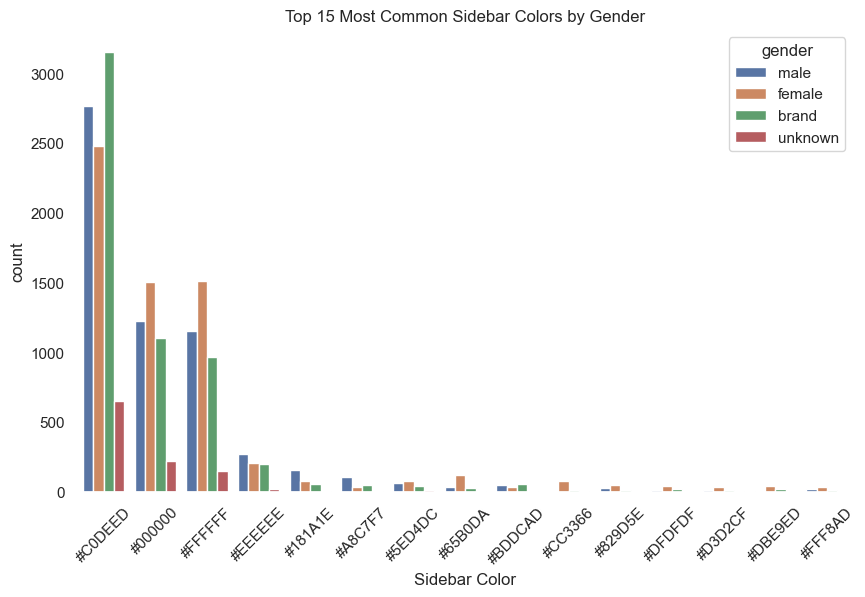

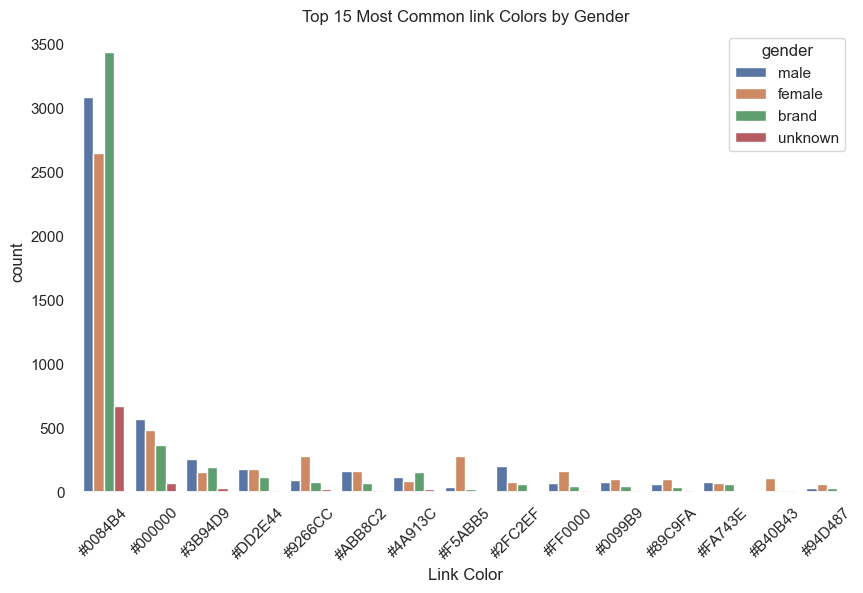

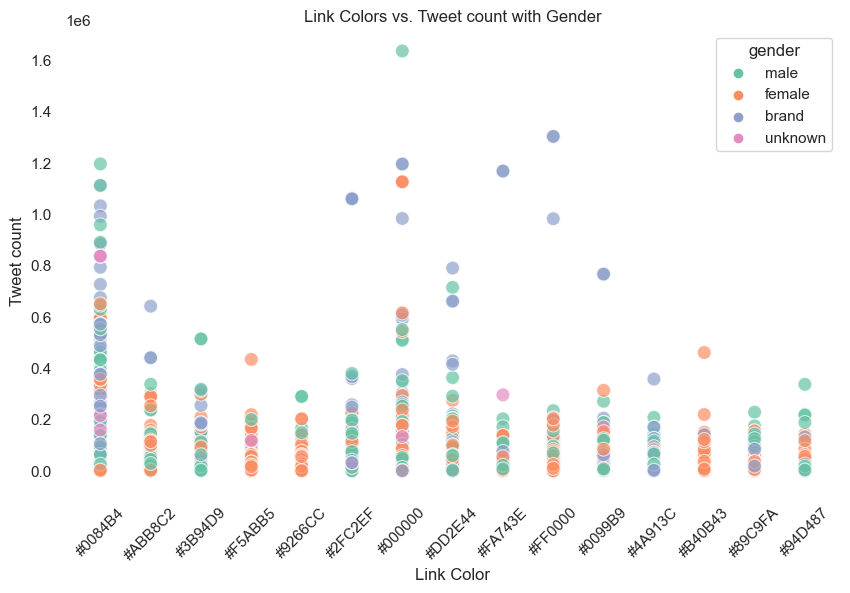

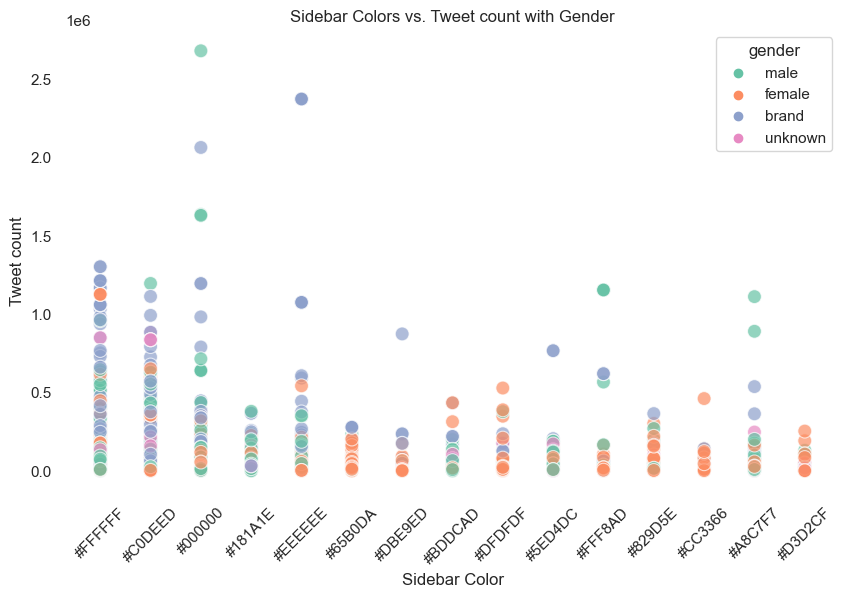

[0 1 2]
<class 'pandas.core.frame.DataFrame'>
Index: 18836 entries, 0 to 20049
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                18836 non-null  int64  
 1   gender:confidence     18836 non-null  float64
 2   description           15522 non-null  object 
 3   name                  18836 non-null  object 
 4   favorites_per_day     18836 non-null  float64
 5   link_color            18836 non-null  object 
 6   retweets_per_day      18836 non-null  float64
 7   sidebar_color         18836 non-null  object 
 8   text                  18836 non-null  object 
 9   tweets_per_day        18836 non-null  float64
 10  tweet_id              18836 non-null  float64
 11  user_timezone         11653 non-null  object 
 12  tweet_location        11994 non-null  object 
 13  profile_created_year  18836 non-null  int32  
 14  tweet_created_year    18836 non-null  int32  
dtypes: float64(5), i

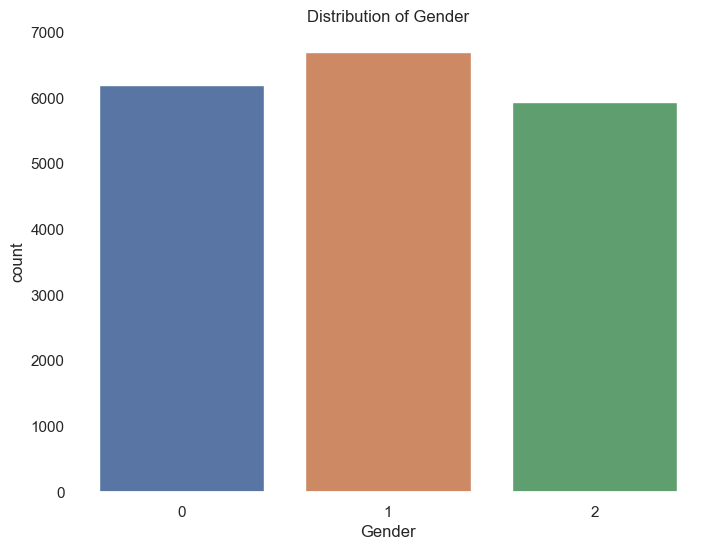

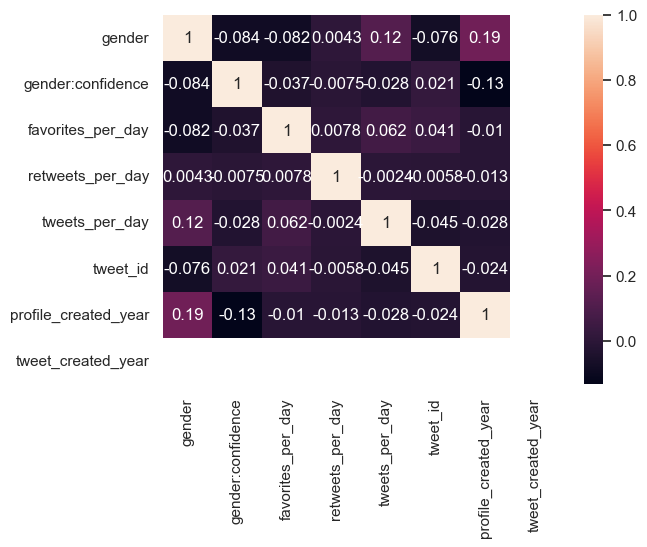

All features that will be used are ['description', 'name', 'favorites_per_day', 'retweets_per_day', 'text', 'tweets_per_day', 'tweet_id', 'profile_created_year', 'tweet_created_year', 'tweet_location_encoded', 'user_timezone_encoded']
After all, here is the information of the dataset
<class 'pandas.core.frame.DataFrame'>
Index: 18836 entries, 0 to 20049
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   description             15522 non-null  object 
 1   name                    18836 non-null  object 
 2   favorites_per_day       18836 non-null  float64
 3   retweets_per_day        18836 non-null  float64
 4   text                    18836 non-null  object 
 5   tweets_per_day          18836 non-null  float64
 6   tweet_id                18836 non-null  float64
 7   profile_created_year    18836 non-null  int32  
 8   tweet_created_year      18836 non-null  int32  
 9   tweet_location_encoded 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shahl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shahl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Shahl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shahl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                         description  \
0                              i sing my own rhythm.   
1  I'm the author of novels filled with family dr...   
2                louis whining and squealing and all   
3  Mobile guy.  49ers, Shazam, Google, Kleiner Pe...   
4  Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...   

                                 cleaned_description  \
0                                        sing rhythm   
1        im author novel filled family drama romance   
2                            louis whining squealing   
3  mobile guy er shazam google kleiner perkins ya...   
4  ricky wilson best frontmankaiser chief best ba...   

                                                text  \
0  Robbie E Responds To Critics After Win Against...   
1  ÛÏIt felt like they were my friends and I was...   
2  i absolutely adore when louis starts the songs...   
3  Hi @JordanSpieth - Looking at the url - do you...   
4  Watching Neighbours on Sky+ catching up wit

In [2]:
# Load the dataset
df = pd.read_csv('twitter_user_data.csv', encoding='ISO-8859-1')

# Quick view of the dataset
print('The information of the dataset')
print(df.info())
print('The first few rows of the dataset')
print(df.head())

all_features = df.columns
#Finding features that have a lot of missing data
def find_columns_with_missing(data, columns):
    missing = []
    i = 0
    for col in columns:
        missing.append(data[col].isnull().sum())
        print(f'the {col} has {missing[i]} data missing')
        print(f'the proportion of missing data to the total is {missing[i]/len(data)}')
        if missing[i]/len(data) >= 0.9:
            print(f'The feature to be dropped is {col}')
            data = data.drop(columns=col)
            data_cleaned = data
        i += 1
    return missing, data_cleaned

missing_col, df_cleaned = find_columns_with_missing(df, all_features)
missing_col
print('The information of the cleaned dataset')
print(df_cleaned.info())
print('The first few rows of the cleaned dataset')
print(df_cleaned.head())

# Dropping rows where 'gender' is missing
df_cleaned = df_cleaned.dropna(subset=['gender'])

# Drop the 'profile_yn' column since it is not relevant to human/non-human classification
df_cleaned = df_cleaned.drop(columns=['profile_yn'])

# Now that we have handled the missing data, you can proceed with further analysis
print('The information of the cleaned dataset')
print(df_cleaned.info())
print('The first few rows of the cleaned dataset')
print(df_cleaned.head())

# Exploratory Data Analysis (EDA)
current_num_features = df.select_dtypes(include=[np.number])

# Plot distribution of each numerical feature with gender as hue using seaborn
for feature in current_num_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_cleaned, x=feature, hue='gender', bins=30, kde=True)
    plt.title(f'Distribution of {feature} by Gender')
    plt.show()

# Distribution of gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df_cleaned)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

# Distribution of tweet count
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['tweet_count'], kde=True, bins=30)
plt.title('Distribution of Tweet count')
plt.xlabel('Tweet count')
plt.ylabel('Density')
plt.show()

# Distribution of retweet count
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['retweet_count'], kde=True, bins=30)
plt.title('Distribution of Retweet count')
plt.xlabel('Retweet count')
plt.ylabel('Density')
plt.show()

# Correlation analysis for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned[['tweet_count', 'retweet_count', 'fav_number']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Extracting date from 'created' and 'tweet_created' for time-based analysis
df_cleaned['profile_created_year'] = pd.to_datetime(df_cleaned['created']).dt.year
df_cleaned['tweet_created_year'] = pd.to_datetime(df_cleaned['tweet_created']).dt.year

# Ensure 'created' and tweet_created are in datetime format
df_cleaned['created'] = pd.to_datetime(df_cleaned['created'], errors='coerce')
df_cleaned['tweet_created'] = pd.to_datetime(df_cleaned['tweet_created'], errors='coerce')

#assuming the data was up-to-date
df_cleaned['account_age'] = (pd.Timestamp.now() - df_cleaned['created']).dt.days

df_cleaned['tweets_per_day'] = df_cleaned['tweet_count'] / df_cleaned['account_age']
df_cleaned['retweets_per_day'] = df_cleaned['retweet_count'] / df_cleaned['account_age']
df_cleaned['favorites_per_day'] = df_cleaned['fav_number'] / df_cleaned['account_age']

# Plotting the distribution of profile creation over the years
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['profile_created_year'], kde=False, bins=15)
plt.title('Distribution of Profile Creation Years')
plt.xlabel('Profile Created Year')
plt.ylabel('count')
plt.show()

# Plotting the histogram of tweets per day
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['tweets_per_day'], bins=50, kde=True)
plt.title('Distribution of Tweets Per Day')
plt.xlabel('Tweets Per Day')
plt.ylabel('Frequency')
plt.show()

#show the relationship between account age and tweets per day
plt.figure(figsize=(10, 6))
sns.scatterplot(x='account_age', y='tweets_per_day', data=df_cleaned)
plt.title('Account Age vs. Tweets Per Day')
plt.xlabel('Account Age (Days)')
plt.ylabel('Tweets Per Day')
plt.show()

# Exploring 'link_color' and 'sidebar_color' features

#Check number of NaN value in  'link_color' and 'sidebar_color' features
link_color_nan_count = df_cleaned['link_color'].isnull().sum()
sidebar_color_nan_count = df_cleaned['sidebar_color'].isnull().sum()

print(f"Number of NaN values in 'link_color': {link_color_nan_count}")
print(f"Number of NaN values in 'sidebar_color': {sidebar_color_nan_count}")

#Check how many available colors in 'link_color' and 'sidebar_color' features
link_color_count = len(df_cleaned['link_color'].unique())
sidebar_color_count = len(df_cleaned['sidebar_color'].unique())
print(f'the number of link color is {link_color_count}')
print(f'the number of side bar color is {sidebar_color_count}')

# Apply the function to 'link_color' and 'sidebar_color'
df_cleaned['link_color'] = df_cleaned['link_color'].apply(lambda x: f'#{x}' if len(x) == 6 else '#000000')
df_cleaned['sidebar_color'] = df_cleaned['sidebar_color'].apply(lambda x: f'#{x}' if len(x) == 6 else '#000000')

# Drop rows where 'sidebar_color' is still NaN
df_cleaned = df_cleaned.dropna(subset=['link_color'])
df_cleaned = df_cleaned.dropna(subset=['sidebar_color'])
print(f"Number of NaN values in 'link_color': {df_cleaned['link_color'].isnull().sum()}")
print(f"Number of NaN values in 'sidebar_color': {df_cleaned['sidebar_color'].isnull().sum()}")

#top 15 colors
top_sidebar_colors = df_cleaned['sidebar_color'].value_counts().iloc[:15].index.tolist()
top_link_colors = df_cleaned['link_color'].value_counts().iloc[:15].index.tolist()
#print(top_sidebar_colors)

# Extract top 10 most common sidebar colors 
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'white'})
plt.figure(figsize=(8, 6))
sns.countplot(y='sidebar_color', data=df_cleaned, order=df_cleaned['sidebar_color'].value_counts().iloc[:15].index, palette=top_sidebar_colors)
plt.title('Top 15 Most Common Profile sidebar_color')
plt.ylabel('Sidebar Color')
plt.xlabel('count')
plt.grid()
plt.show()

# Extract top 10 most common link colors 
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'white'})
plt.figure(figsize=(8, 6))
sns.countplot(y='link_color', data=df_cleaned, order=df_cleaned['link_color'].value_counts().iloc[:15].index, palette=top_link_colors)
plt.title('Top 15 Most Common Profile link_color')
plt.ylabel('Link Color')
plt.xlabel('count')
plt.grid()
plt.show()

# count plot for sidebar_color vs. gender
plt.figure(figsize=(10, 6))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.countplot(x='sidebar_color', hue='gender', data=df_cleaned, 
              order=df_cleaned['sidebar_color'].value_counts().iloc[:15].index)
plt.title('Top 15 Most Common Sidebar Colors by Gender')
plt.xlabel('Sidebar Color')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

# count plot for link_color vs. gender
plt.figure(figsize=(10, 6))
sns.countplot(x='link_color', hue='gender', data=df_cleaned, 
              order=df_cleaned['link_color'].value_counts().iloc[:15].index)
plt.title('Top 15 Most Common link Colors by Gender')
plt.xlabel('Link Color')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

# Scatter plot for link_color vs. tweet_count with gender as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='link_color', y='tweet_count', hue='gender', data=df_cleaned[df_cleaned['link_color'].isin(top_link_colors)], 
                palette='Set2', s=100, alpha=0.7)
plt.title('Link Colors vs. Tweet count with Gender')
plt.xlabel('Link Color')
plt.ylabel('Tweet count')
plt.xticks(rotation=45)
plt.show()

# Scatter plot for sidebar_color vs. tweet_count with gender as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sidebar_color', y='tweet_count', hue='gender', data=df_cleaned[df_cleaned['sidebar_color'].isin(top_sidebar_colors)], 
                palette='Set2', s=100, alpha=0.7)
plt.title('Sidebar Colors vs. Tweet count with Gender')
plt.xlabel('Sidebar Color')
plt.ylabel('Tweet count')
plt.xticks(rotation=45)
plt.show()

# Select columns to be used
col = ['gender', 'gender:confidence', 'description', 'name', 'favorites_per_day','link_color',
       'retweets_per_day', 'sidebar_color', 'text', 'tweets_per_day', 'tweet_id','user_timezone', 'tweet_location', 'profile_created_year', 'tweet_created_year'
       ]
df_preprocessed = df_cleaned[col].copy()
# Remove rows where gender is 'Unknown'
df_preprocessed = df_preprocessed[df_preprocessed['gender'] != 'unknown']

# First, encode the 'gender' column to numeric values
df_preprocessed['gender'] = df_preprocessed['gender'].replace({'male': 0, 'female': 1, 'brand': 2})

# Check for unique values in the 'gender' column after replacement
print(df_preprocessed['gender'].unique())
print(df_preprocessed.info())

# Distribution of gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df_preprocessed)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

# Plot correlation matrix
corr_matrix = df_preprocessed.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Drop one feature from highly correlated pairs (correlation > 0.9)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df_preprocessed = df_preprocessed.drop(columns=to_drop)

# One-Hot Encoding for categorical features like 'user_timezone' and 'tweet_location'
# Filling missing values for important features
df_preprocessed['user_timezone'].fillna('Unknown', inplace=True)
df_preprocessed['tweet_location'].fillna('Unknown', inplace=True)
categorical_features = ['user_timezone', 'tweet_location']

#categorise types of features
df_num = df_preprocessed[['retweets_per_day', 'favorites_per_day', 'tweets_per_day', 'tweet_id', 'profile_created_year', 'tweet_created_year']].copy()

freq_encoding_location = df_preprocessed['tweet_location'].value_counts(normalize=True)
df_preprocessed['tweet_location_encoded'] = df_preprocessed['tweet_location'].map(freq_encoding_location)

freq_encoding_timezone = df_preprocessed['user_timezone'].value_counts(normalize=True)
df_preprocessed['user_timezone_encoded'] = df_preprocessed['user_timezone'].map(freq_encoding_timezone)


df_cate = df_preprocessed[['tweet_location_encoded', 'user_timezone_encoded']].copy()

# Drop the original categorical columns
df_preprocessed = df_preprocessed.drop(columns=categorical_features)

# Function to convert hex to RGB
def hex_to_rgb(hex_color):
    # Remove the '#' if it exists
    hex_color = hex_color.lstrip('#')
    
    # Convert hex to integer and split into RGB components
    return [int(hex_color[i:i+2], 16) for i in (0, 2, 4)]

# Convert 'link_color' values
df_preprocessed['link_color_rgb'] = df_preprocessed['link_color'].apply(lambda x: hex_to_rgb(x) if isinstance(x, str) else (0,0,0))
# Convert 'sidebar_color' values
df_preprocessed['sidebar_color_rgb'] = df_preprocessed['sidebar_color'].apply(lambda x: hex_to_rgb(x) if isinstance(x, str) else (0,0,0))

rgb_df = pd.DataFrame(df_preprocessed['link_color_rgb'].to_list(), columns=['link_R', 'link_G', 'link_B'])
rgb_df = pd.concat([rgb_df, pd.DataFrame(df_preprocessed['sidebar_color_rgb'].to_list(), columns=['sidebar_R', 'sidebar_G', 'sidebar_B'])], axis=1)

#Drop the original color features
df_preprocessed = df_preprocessed.drop(columns=['link_color', 'sidebar_color', 'link_color_rgb', 'sidebar_color_rgb'])

#Drop gender feature
preprocessed_gender_conf  = df_preprocessed["gender:confidence"].copy()
df_preprocessed = df_preprocessed.drop(columns=['gender', 'gender:confidence'])

#Check if all required features are there
print(f'All features that will be used are {df_preprocessed.columns.tolist()}')

# Define the numerical features to scale (filtering for int64 and float64 columns)
numerical_features = df_preprocessed.select_dtypes(include=[np.number])
#print(f'All current numerical features are {numerical_features.columns.tolist()}')

print('After all, here is the information of the dataset')
print(df_preprocessed.info())



# NLP Processing
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

df_preprocessed['description'].fillna('', inplace=True)
df_preprocessed['text'].fillna('', inplace=True)
#df_preprocessed['name'].fillna('', inplace=True)

#Check the text features if they still contain NaN
print(df_preprocessed.select_dtypes(include=[object]))


# Define stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    #Remove punctuation and special characters
    text = text.translate(str.maketrans('', '', string.punctuation))  # Removes punctuation
    text = re.sub(r'[^A-Za-z\s]', '', text)  
    #Tokenize the text
    tokens = word_tokenize(text)
    #Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    #Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    #Join tokens back into a string
    return ' '.join(tokens)

# Apply preprocessing to the 'description', 'text', and 'name' columns
df_preprocessed['cleaned_description'] = df_preprocessed['description'].apply(lambda x: preprocess_text(str(x)))
df_preprocessed['cleaned_text'] = df_preprocessed['text'].apply(lambda x: preprocess_text(str(x)))
#df_preprocessed['cleaned_name'] = df_preprocessed['name'].apply(lambda x: preprocess_text(str(x)))

# Check the preprocessed data with preprocessed text features
print(df_preprocessed[['description', 'cleaned_description', 'text', 'cleaned_text']].head())

#Drop the original text features
df_preprocessed = df_preprocessed.drop(columns=['description','text'])

#Check the preprocessed dataset in the present
print('The current information of pre-processed dataset before text preprocessing')
print(df_preprocessed.info())


# Initialize TFIDF vectorizer for text features
tfidf_vectorizer = TfidfVectorizer(max_features=1500, stop_words='english')

# Apply TF-IDF on 'description', 'text', 'name' columns

tfidf_description = tfidf_vectorizer.fit_transform(df_preprocessed['cleaned_description']).toarray()
tfidf_text = tfidf_vectorizer.fit_transform(df_preprocessed['cleaned_text']).toarray()
#tfidf_name = tfidf_vectorizer.fit_transform(df_preprocessed['cleaned_name']).toarray()

# Convert TF-IDF into DataFrames and add to df_preprocessed
tfidf_desc_df = pd.DataFrame(tfidf_description, columns=[f'desc_{i}' for i in range(tfidf_description.shape[1])])
tfidf_text_df = pd.DataFrame(tfidf_text, columns=[f'text_{i}' for i in range(tfidf_text.shape[1])])
#tfidf_name_df = pd.DataFrame(tfidf_name, columns=[f'name_{i}' for i in range(tfidf_name.shape[1])])

# Merge with main dataframe
df_preprocessed = pd.concat([df_preprocessed.reset_index(drop=True), tfidf_desc_df, tfidf_text_df], axis=1)

#Drop the cleaned text features
df_preprocessed = df_preprocessed.drop(columns=['cleaned_description', 'cleaned_text'])

In [3]:
df_preprocessed.head()

,name,favorites_per_day,retweets_per_day,tweets_per_day,tweet_id,profile_created_year,tweet_created_year,tweet_location_encoded,user_timezone_encoded,desc_0,...,text_1490,text_1491,text_1492,text_1493,text_1494,text_1495,text_1496,text_1497,text_1498,text_1499
0,sheezy0,0.000000,0.000000,28.163452,6.587300e+17,2013,2015,0.000053,0.001699,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DavdBurnett,0.015564,0.000000,1.710002,6.587300e+17,2012,2015,0.363294,0.127309,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,lwtprettylaugh,2.148520,0.000279,1.568118,6.587300e+17,2014,2015,0.000053,0.002071,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,douggarland,0.036220,0.000000,0.303568,6.587300e+17,2009,2015,0.000159,0.105755,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,WilfordGemma,9.802469,0.000000,8.264250,6.587300e+17,2014,2015,0.363294,0.381344,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
object_cols = df_preprocessed.select_dtypes(include='object').columns
print(object_cols)

Index(['name'], dtype='object')


In [5]:
df_preprocessed = df_preprocessed.drop(['name'], axis=1)

## Regression Models 

In [6]:
#set our regression target values
y = preprocessed_gender_conf.reset_index(drop=True)


In [7]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_preprocessed, y, test_size=0.7, random_state=42)

boosted_reg = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
boosted_reg.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=50, random_state=42)

## Analysing results

In [8]:
from sklearn.metrics import mean_squared_error

# Make predictions
y_pred = boosted_reg.predict(X_test)

# Evaluate performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.028949681852932296


In [9]:
y_tot_pred = boosted_reg.predict(df_preprocessed)
mse = mean_squared_error(y, y_tot_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.028122615707355744


In [10]:
#checking feature importance

# Find column indices that start with 'desc_' and 'text_'
desc_columns = [i for i, col in enumerate(df_preprocessed.columns) if col.startswith('desc_')]
text_columns = [i for i, col in enumerate(df_preprocessed.columns) if col.startswith('text_')]

# Access the corresponding elements from the ndarray using the column indices
desc_array = boosted_reg.feature_importances_[desc_columns]
text_array = boosted_reg.feature_importances_[text_columns]

# Output the results
print("desc_ column indices:", desc_columns)
print("text_ column indices:", text_columns)
print("desc_ array:\n", desc_array)
print("text_ array:\n", text_array)

# Sum the values for desc_ and text_ columns
desc_sum = np.sum(boosted_reg.feature_importances_[desc_columns])
text_sum = np.sum(boosted_reg.feature_importances_[text_columns])

# Create a new DataFrame
new_data = {}

# Add the 'desc' and 'text' columns with the summed values
new_data['desc'] = [desc_sum]
new_data['text'] = [text_sum]
boosted_reg.feature_importances_

# Add the other feature columns that are not desc_ or text_
other_columns = [i for i in range(len(df_preprocessed.columns)) if i not in desc_columns and i not in text_columns]

for i in other_columns:
    col_name = df_preprocessed.columns[i]
    new_data[col_name] = [boosted_reg.feature_importances_[i]]

# Convert the new_data dictionary to a DataFrame
feature_importance = pd.DataFrame(new_data)

# Output the results
print(feature_importance)

desc_ column indices: [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 2

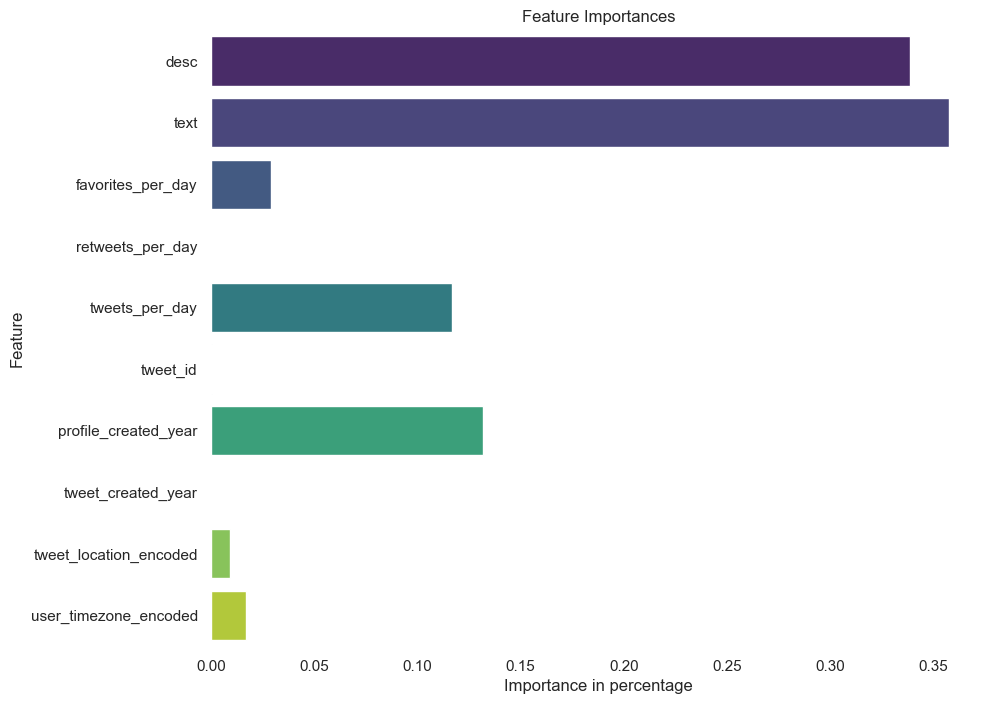

In [11]:
# Convert DataFrame to a long format suitable for Seaborn
df_melted = feature_importance.melt(var_name='Feature', value_name='Importance in percentage')

# Create bar plot using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance in percentage', y='Feature', data=df_melted, palette='viridis')

# Add a title
plt.title('Feature Importances')

# Show the plot
plt.show()

In [12]:
df_preprocessed_diff = df_preprocessed.copy()
df_preprocessed_diff['abs_difference'] = (abs(y.to_numpy() - y_tot_pred))

In [13]:
df_preprocessed_diff["abs_difference"].describe()

count    18836.000000
mean         0.138667
std          0.094311
min          0.001569
25%          0.079613
50%          0.094619
75%          0.168580
max          0.600668
Name: abs_difference, dtype: float64

In [14]:
# Find samples where the abs difference os over .2
misclassified_df = df_preprocessed_diff[df_preprocessed_diff["abs_difference"] > 0.2]

#Further filter based on indices in X_train.index
non_train_misclassify = misclassified_df[misclassified_df.index.isin(X_train.index)]
train_misclassify = misclassified_df[~misclassified_df.index.isin(X_train.index)]

print(non_train_misclassify["abs_difference"].describe())
print(train_misclassify["abs_difference"].describe())
print(misclassified_df["abs_difference"].describe())

count    1160.000000
mean        0.278931
std         0.096486
min         0.200279
25%         0.230187
50%         0.245285
75%         0.262481
max         0.591468
Name: abs_difference, dtype: float64
count    2782.000000
mean        0.288046
std         0.112172
min         0.200085
25%         0.231173
50%         0.246618
75%         0.264480
max         0.600668
Name: abs_difference, dtype: float64
count    3942.000000
mean        0.285364
std         0.107861
min         0.200085
25%         0.230767
50%         0.246089
75%         0.263885
max         0.600668
Name: abs_difference, dtype: float64


## Check where the gender confidence in regression is below a threshold

## Notes
Instead of taking the difference take everywhere where the model has much lower gender confidence then the dataset

WHAT WE WANT IS PLACES WHERE REGRESSION CONF IS LOWER THEN NON REGRESSION CONDFIDENCE

In [15]:
#adding the prediction to the dataset
df_preprocessed_diff["gender_confidence_pred"] = y_tot_pred

#adding the dataset gender confidence
y_reset = y.reset_index(drop=True)
df_preprocessed_diff["gender:confidence"] = y_reset

print(df_preprocessed_diff["gender_confidence_pred"].describe())
print(y.describe())

count    18836.000000
mean         0.900914
std          0.030007
min          0.649431
25%          0.895038
50%          0.909245
75%          0.920387
max          0.947084
Name: gender_confidence_pred, dtype: float64
count    18836.000000
mean         0.900997
std          0.172980
min          0.314000
25%          0.686475
50%          1.000000
75%          1.000000
max          1.000000
Name: gender:confidence, dtype: float64


In [16]:
df_preprocessed_diff["difference"] = y.to_numpy() - y_tot_pred
df_preprocessed_diff[(df_preprocessed_diff["difference"] > 0.15) & (df_preprocessed_diff["gender_confidence_pred"] < 0.85)]

,favorites_per_day,retweets_per_day,tweets_per_day,tweet_id,profile_created_year,tweet_created_year,tweet_location_encoded,user_timezone_encoded,desc_0,desc_1,...,text_1494,text_1495,text_1496,text_1497,text_1498,text_1499,abs_difference,gender_confidence_pred,gender:confidence,difference
100,0.079670,0.000000,0.269384,6.587300e+17,2014,2015,0.363294,0.381344,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.163436,0.836564,1.0,0.163436
102,0.014815,0.000000,6.075446,6.587300e+17,2014,2015,0.000319,0.001646,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.153511,0.846489,1.0,0.153511
323,4.574048,0.000000,47.035261,6.587300e+17,2015,2015,0.000319,0.105755,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.233756,0.766244,1.0,0.233756
394,4.169295,0.000000,56.391167,6.587300e+17,2014,2015,0.000319,0.105755,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.162479,0.837521,1.0,0.162479
544,0.018346,0.000000,0.279098,6.587300e+17,2015,2015,0.000053,0.381344,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.151850,0.848150,1.0,0.151850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18557,0.011814,0.000000,8.152046,6.587400e+17,2012,2015,0.000053,0.001911,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.169369,0.830631,1.0,0.169369
18593,1.414132,0.000000,1.665921,6.587400e+17,2012,2015,0.363294,0.030049,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.205650,0.794350,1.0,0.205650
18616,1.339410,0.000000,10.553680,6.587400e+17,2012,2015,0.363294,0.015449,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.179468,0.820532,1.0,0.179468
18723,0.083287,0.000184,16.298323,6.587400e+17,2009,2015,0.000053,0.077033,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.197937,0.802063,1.0,0.197937


In [17]:
misclassified_df = df_preprocessed_diff[(df_preprocessed_diff["difference"] > 0.1) & (df_preprocessed_diff["gender_confidence_pred"] < 0.85)]

non_train_misclassify = misclassified_df[misclassified_df.index.isin(X_train.index)]
train_misclassify = misclassified_df[~misclassified_df.index.isin(X_train.index)]


print(misclassified_df.info())
print(non_train_misclassify.info())
print(train_misclassify.info())

<class 'pandas.core.frame.DataFrame'>
Index: 667 entries, 100 to 18825
Columns: 3012 entries, favorites_per_day to difference
dtypes: float64(3010), int32(2)
memory usage: 15.3 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, 2243 to 17766
Columns: 3012 entries, favorites_per_day to difference
dtypes: float64(3010), int32(2)
memory usage: 2.9 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 100 to 18825
Columns: 3012 entries, favorites_per_day to difference
dtypes: float64(3010), int32(2)
memory usage: 12.4 MB
None


C:\Users\Shahl\AppData\Local\Temp\ipykernel_25768\3000832750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified_df["in X_train"] = misclassified_df.index.isin(X_train.index)


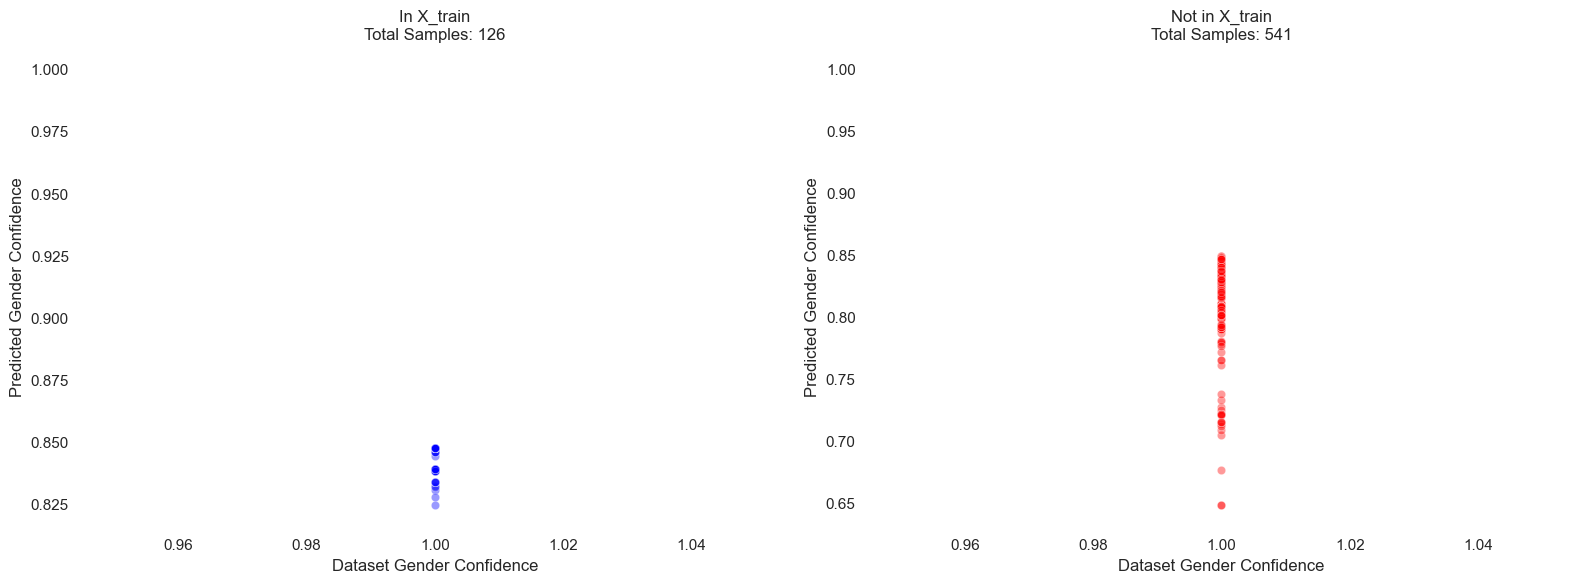

In [18]:
# Edit misclassified_df to include 'in X_train'
misclassified_df["in X_train"] = misclassified_df.index.isin(X_train.index)

# Create subsets for the two plots
df_in_X_train = misclassified_df[misclassified_df["in X_train"]]
df_not_in_X_train = misclassified_df[~misclassified_df["in X_train"]]

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Points in X_train
sns.scatterplot(data=df_in_X_train, x='gender:confidence', y='gender_confidence_pred', alpha=0.4, ax=axes[0], color='blue')
axes[0].plot([df_in_X_train['gender:confidence'].min(), df_in_X_train['gender:confidence'].max()],
             [df_in_X_train['gender:confidence'].min(), df_in_X_train['gender:confidence'].max()], 'k--', lw=2)
axes[0].set_xlabel('Dataset Gender Confidence')
axes[0].set_ylabel('Predicted Gender Confidence')
axes[0].set_title(f'In X_train\nTotal Samples: {len(df_in_X_train)}')

# Plot 2: Points not in X_train
sns.scatterplot(data=df_not_in_X_train, x='gender:confidence', y='gender_confidence_pred', alpha=0.4, ax=axes[1], color='red')
axes[1].plot([df_not_in_X_train['gender:confidence'].min(), df_not_in_X_train['gender:confidence'].max()],
             [df_not_in_X_train['gender:confidence'].min(), df_not_in_X_train['gender:confidence'].max()], 'k--', lw=2)
axes[1].set_xlabel('Dataset Gender Confidence')
axes[1].set_ylabel('Predicted Gender Confidence')
axes[1].set_title(f'Not in X_train\nTotal Samples: {len(df_not_in_X_train)}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
#Check if there are any places where there the regression is high and data is very low
df_preprocessed_diff[(df_preprocessed_diff["gender_confidence_pred"] > 0.9) & (df_preprocessed_diff["gender:confidence"] < 0.9)]

,favorites_per_day,retweets_per_day,tweets_per_day,tweet_id,profile_created_year,tweet_created_year,tweet_location_encoded,user_timezone_encoded,desc_0,desc_1,...,text_1494,text_1495,text_1496,text_1497,text_1498,text_1499,abs_difference,gender_confidence_pred,gender:confidence,difference
10,0.110045,0.0,1.104500,6.587300e+17,2011,2015,0.003238,0.030049,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.224478,0.924678,0.7002,-0.224478
12,0.762325,0.0,3.072139,6.587300e+17,2012,2015,0.363294,0.030049,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.258345,0.909245,0.6509,-0.258345
14,3.330464,0.0,4.416308,6.587300e+17,2013,2015,0.000053,0.030049,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.259145,0.909245,0.6501,-0.259145
47,0.373984,0.0,0.464685,6.587300e+17,2013,2015,0.000053,0.000319,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.254373,0.912673,0.6583,-0.254373
55,0.000000,0.0,0.839575,6.587300e+17,2015,2015,0.000053,0.381344,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.236981,0.905381,0.6684,-0.236981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18802,8.853249,0.0,5.611950,6.587300e+17,2011,2015,0.000106,0.024740,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.155387,0.920387,0.7650,-0.155387
18809,0.000396,0.0,0.000990,6.587300e+17,2010,2015,0.363294,0.381344,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.351268,0.927468,0.5762,-0.351268
18810,0.053395,0.0,3.333982,6.587300e+17,2009,2015,0.000531,0.000637,0.0,0.0,...,0.0,0.656343,0.0,0.0,0.0,0.0,0.362216,0.916216,0.5540,-0.362216
18824,0.000000,0.0,1.530467,6.587400e+17,2012,2015,0.363294,0.381344,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.094732,0.934432,0.8397,-0.094732


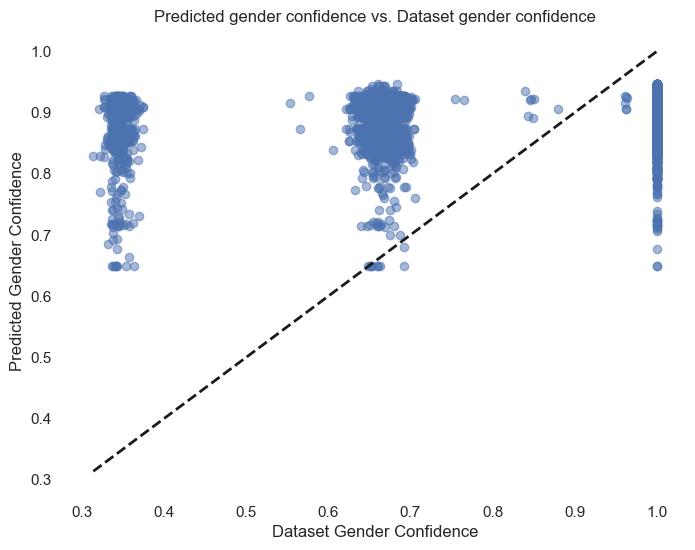

In [20]:
#Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(y, y_tot_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Dataset Gender Confidence')
plt.ylabel('Predicted Gender Confidence')
plt.title('Predicted gender confidence vs. Dataset gender confidence')
plt.show()

Text(0.5, 1.0, '"Histogram of Prediction Errors: Negative Values Indicate dataset gender confidence > predicted gender confidence"')

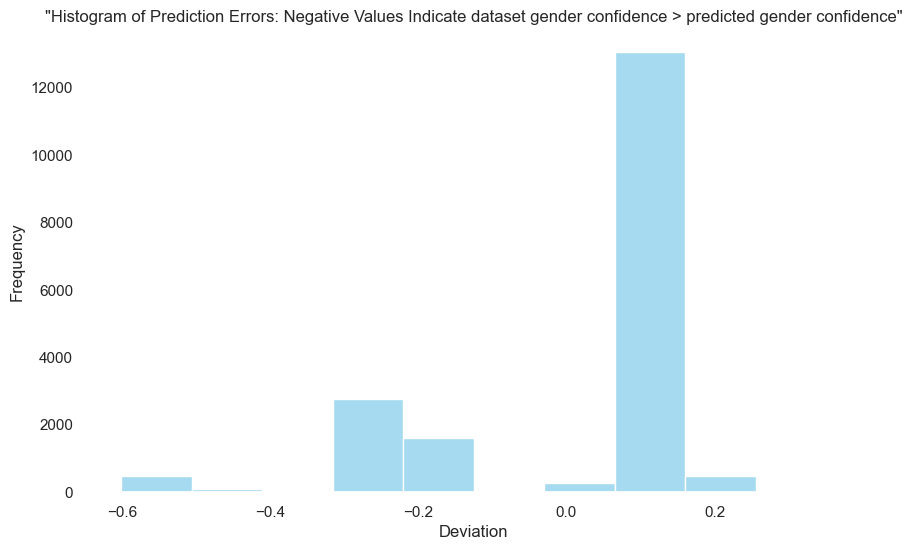

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_preprocessed_diff, x='difference', bins=10, kde=False, color='skyblue')
plt.xlabel('Deviation')
plt.ylabel('Frequency')
plt.title('"Histogram of Prediction Errors: Negative Values Indicate dataset gender confidence > predicted gender confidence"')

The dataset seems to be strongly biased towards a high gender confidence meaning that the model likly retains this same bias. Meaning that the model has a tendency to predict a high gender confidence and treat low gender confidences as an outlier.
    -> A classification model is more suited for the task.

However places where the regression model outputs a significantly lower gender confidence then the dataset (especially when the dataset has a gender confidence of 1) are of particulare interest. 

ALSO; worth noting that we only have a large differnce for when the dataset gender conf = 1

FOR PLOTS:
1) FEATURE IMPORTANCE AND SHAPLEY VALUES
2) SOME BOOSTED TREE PLOTS? PLOT THE RESULTS AND SOME DIST OF THE SUSPICIOUS COLUMNS?

## Redo without including text / desc features

In [22]:
# Identify columns to drop
columns_to_drop = [col for col in df_preprocessed.columns if col.startswith(('desc_', 'text_'))]

# Drop the identified columns
df_preprocessed_non_text = df_preprocessed.drop(columns=columns_to_drop)

# Output the result
print(df_preprocessed_non_text)

       favorites_per_day  retweets_per_day  tweets_per_day      tweet_id  \
0               0.000000          0.000000       28.163452  6.587300e+17   
1               0.015564          0.000000        1.710002  6.587300e+17   
2               2.148520          0.000279        1.568118  6.587300e+17   
3               0.036220          0.000000        0.303568  6.587300e+17   
4               9.802469          0.000000        8.264250  6.587300e+17   
...                  ...               ...             ...           ...   
18831           0.090663          0.000000        0.235065  6.587400e+17   
18832           0.569067          0.000000        3.062274  6.587300e+17   
18833           0.011369          0.000000        6.007049  6.587400e+17   
18834          16.340642          0.000000       12.940919  6.587300e+17   
18835           0.878971          0.000000        0.767130  6.587400e+17   

       profile_created_year  tweet_created_year  tweet_location_encoded  \
0           

In [23]:
boosted_reg_non_text = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)
# Split the dataset into training and testing sets
X_train_non_text, X_test_non_text, y_train_non_text, y_test_non_text = train_test_split(df_preprocessed_non_text, y, test_size=0.7, random_state=42)

# Fit the model
boosted_reg_non_text.fit(X_train_non_text, y_train_non_text)

GradientBoostingRegressor(n_estimators=50, random_state=42)

In [24]:
from sklearn.metrics import mean_squared_error

# Make predictions
y_pred = boosted_reg_non_text.predict(X_test_non_text)

# Evaluate performance using Mean Squared Error
mse = mean_squared_error(y_test_non_text, y_pred)
print(f"Mean Squared Error: {mse}")

y_tot_pred = boosted_reg_non_text.predict(df_preprocessed_non_text)
mse = mean_squared_error(y, y_tot_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.02902462759816569
Mean Squared Error: 0.028510429352024164


In [25]:
# Get feature importances from the model
feature_importances = boosted_reg_non_text.feature_importances_

# Get column names from X_train
column_names = X_train.columns

# Create a DataFrame with feature importances and corresponding column names
feature_importance_df = pd.DataFrame({
    'Feature': column_names,
    'Importance in percentage': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance in percentage', ascending=False)

# Output the DataFrame
print(feature_importance_df)

                  Feature  Importance in percentage
2          tweets_per_day                  0.355385
0       favorites_per_day                  0.237008
4    profile_created_year                  0.221512
7   user_timezone_encoded                  0.120650
6  tweet_location_encoded                  0.046550
3                tweet_id                  0.012980
1        retweets_per_day                  0.005914
5      tweet_created_year                  0.000000


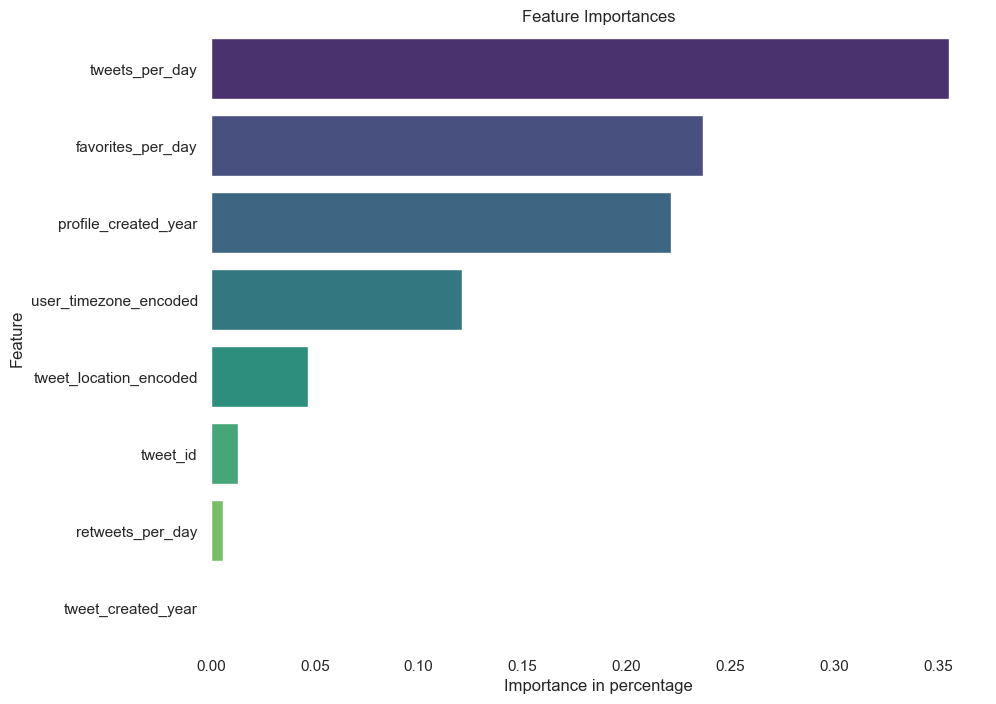

In [26]:
# Convert DataFrame to a long format suitable for Seaborn

# Create bar plot using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance in percentage', y='Feature', data=feature_importance_df, palette='viridis')

# Add a title
plt.title('Feature Importances')

# Show the plot
plt.show()

In [27]:
df_preprocessed_non_text["gender_confidence_pred"] = y_tot_pred

#adding the dataset gender confidence
y_reset = y.reset_index(drop=True)
df_preprocessed_non_text["gender:confidence"] = y_reset

print(df_preprocessed_non_text["gender_confidence_pred"].describe())

count    18836.000000
mean         0.901057
std          0.036071
min          0.531954
25%          0.884174
50%          0.907729
75%          0.927289
max          0.983469
Name: gender_confidence_pred, dtype: float64


In [28]:
#Inspecting coulumns that could be suspicous
df_preprocessed_non_text["difference"] = y.to_numpy() - y_tot_pred

misclassified_df = df_preprocessed_non_text[(df_preprocessed_non_text["difference"] > 0.1) & (df_preprocessed_non_text["gender_confidence_pred"] < 0.85)]

non_train_misclassify = misclassified_df[misclassified_df.index.isin(X_train_non_text.index)]
train_misclassify = misclassified_df[~misclassified_df.index.isin(X_train_non_text.index)]


print(misclassified_df.info())
print(non_train_misclassify.info())
print(train_misclassify.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1059 entries, 11 to 18738
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   favorites_per_day       1059 non-null   float64
 1   retweets_per_day        1059 non-null   float64
 2   tweets_per_day          1059 non-null   float64
 3   tweet_id                1059 non-null   float64
 4   profile_created_year    1059 non-null   int32  
 5   tweet_created_year      1059 non-null   int32  
 6   tweet_location_encoded  1059 non-null   float64
 7   user_timezone_encoded   1059 non-null   float64
 8   gender_confidence_pred  1059 non-null   float64
 9   gender:confidence       1059 non-null   float64
 10  difference              1059 non-null   float64
dtypes: float64(9), int32(2)
memory usage: 91.0 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 11 to 18330
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dty

C:\Users\Shahl\AppData\Local\Temp\ipykernel_25768\3000832750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified_df["in X_train"] = misclassified_df.index.isin(X_train.index)


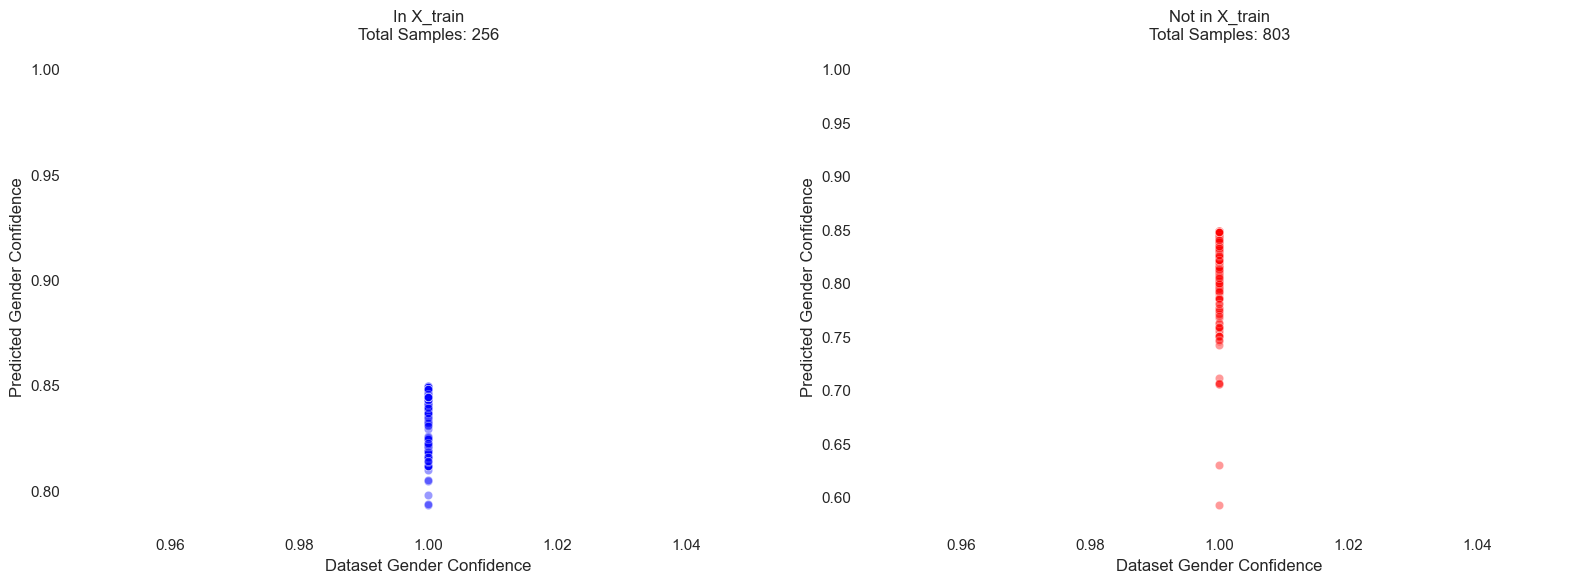

In [29]:
# Edit misclassified_df to include 'in X_train'
misclassified_df["in X_train"] = misclassified_df.index.isin(X_train_non_text.index)

# Create subsets for the two plots
df_in_X_train = misclassified_df[misclassified_df["in X_train"]]
df_not_in_X_train = misclassified_df[~misclassified_df["in X_train"]]

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Points in X_train
sns.scatterplot(data=df_in_X_train, x='gender:confidence', y='gender_confidence_pred', alpha=0.4, ax=axes[0], color='blue')
axes[0].plot([df_in_X_train['gender:confidence'].min(), df_in_X_train['gender:confidence'].max()],
             [df_in_X_train['gender:confidence'].min(), df_in_X_train['gender:confidence'].max()], 'k--', lw=2)
axes[0].set_xlabel('Dataset Gender Confidence')
axes[0].set_ylabel('Predicted Gender Confidence')
axes[0].set_title(f'In X_train\nTotal Samples: {len(df_in_X_train)}')

# Plot 2: Points not in X_train
sns.scatterplot(data=df_not_in_X_train, x='gender:confidence', y='gender_confidence_pred', alpha=0.4, ax=axes[1], color='red')
axes[1].plot([df_not_in_X_train['gender:confidence'].min(), df_not_in_X_train['gender:confidence'].max()],
             [df_not_in_X_train['gender:confidence'].min(), df_not_in_X_train['gender:confidence'].max()], 'k--', lw=2)
axes[1].set_xlabel('Dataset Gender Confidence')
axes[1].set_ylabel('Predicted Gender Confidence')
axes[1].set_title(f'Not in X_train\nTotal Samples: {len(df_not_in_X_train)}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

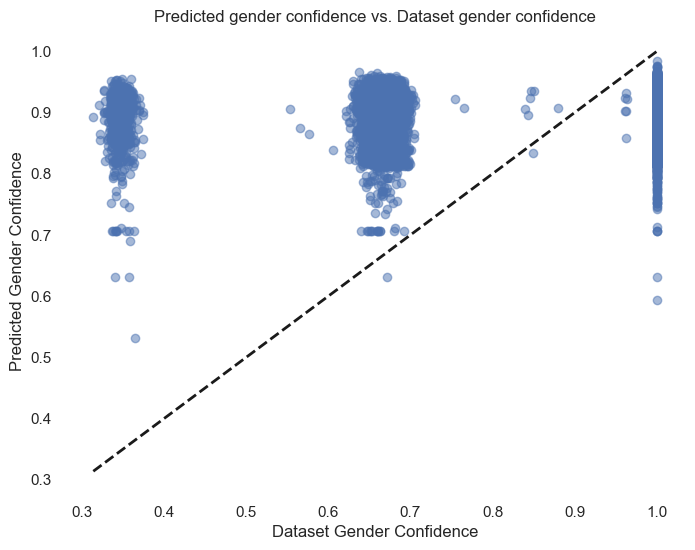

In [30]:
#Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(y, y_tot_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Dataset Gender Confidence')
plt.ylabel('Predicted Gender Confidence')
plt.title('Predicted gender confidence vs. Dataset gender confidence')
plt.show()

Text(0.5, 1.0, '"Histogram of Prediction Errors: Negative Values Indicate dataset gender confidence > predicted gender confidence"')

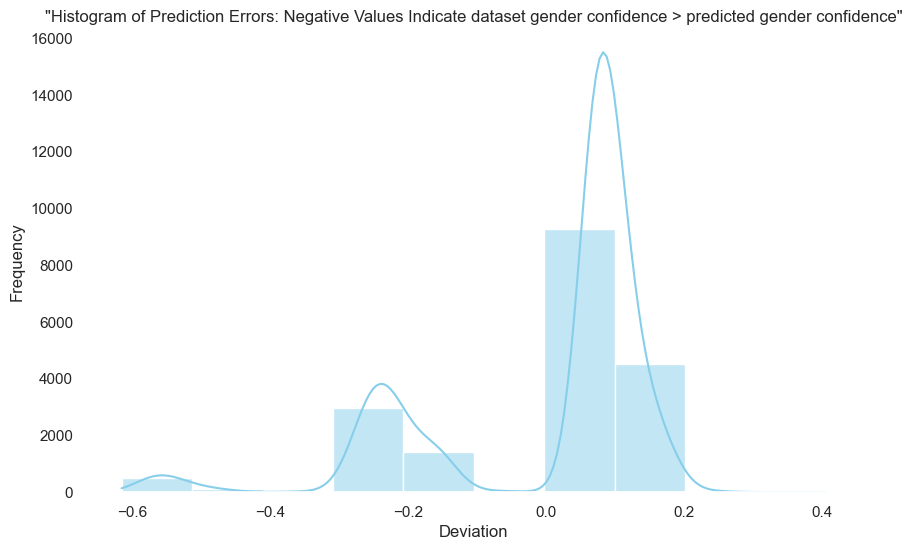

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_preprocessed_non_text, x='difference', bins=10, kde=True, color='skyblue')
plt.xlabel('Deviation')
plt.ylabel('Frequency')
plt.title('"Histogram of Prediction Errors: Negative Values Indicate dataset gender confidence > predicted gender confidence"')

## Using linear regression

A simple linear regression technique is now employed

Regularization is employed (even though we have a very simple low bias model) in order to ensure we do not overfit

In [8]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

X_train_lin = sm.add_constant(X_train)
X_test_lin = sm.add_constant(X_test)
df_preprocessed_lin = sm.add_constant(df_preprocessed)

model = sm.OLS(y_train, X_train_lin)  # Ordinary least squares (unregularized)
results = model.fit()

#print(results.summary())

In [12]:
#run predictions
y_lin_pred = results.predict(X_test_lin)
y_lin_tot_pred = results.predict(df_preprocessed_lin)

# Evaluate performance using Mean Squared Error
mse = mean_squared_error(y_test, y_lin_pred)
print(f"Mean Squared Error: {mse}")

mse = mean_squared_error(y, y_lin_tot_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.029905412647208366
Mean Squared Error: 0.02992069210622919


In [18]:
df_preprocessed_lin["difference"] = y.to_numpy() - y_lin_tot_pred
y_reset = y.reset_index(drop=True)
df_preprocessed_lin["gender_confidence_pred"] = y_lin_tot_pred


misclassified_df = df_preprocessed_lin[(df_preprocessed_lin["difference"] > 0.1) & (df_preprocessed_lin["gender_confidence_pred"] < 0.85)]

non_train_misclassify = misclassified_df[misclassified_df.index.isin(X_train_lin.index)]
train_misclassify = misclassified_df[~misclassified_df.index.isin(X_train_lin.index)]


print(misclassified_df.info())
print(non_train_misclassify.info())
print(train_misclassify.info())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 3011 entries, favorites_per_day to gender_confidence_pred
dtypes: float64(3009), int32(2)
memory usage: 0.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 3011 entries, favorites_per_day to gender_confidence_pred
dtypes: float64(3009), int32(2)
memory usage: 0.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 3011 entries, favorites_per_day to gender_confidence_pred
dtypes: float64(3009), int32(2)
memory usage: 0.0 bytes
None


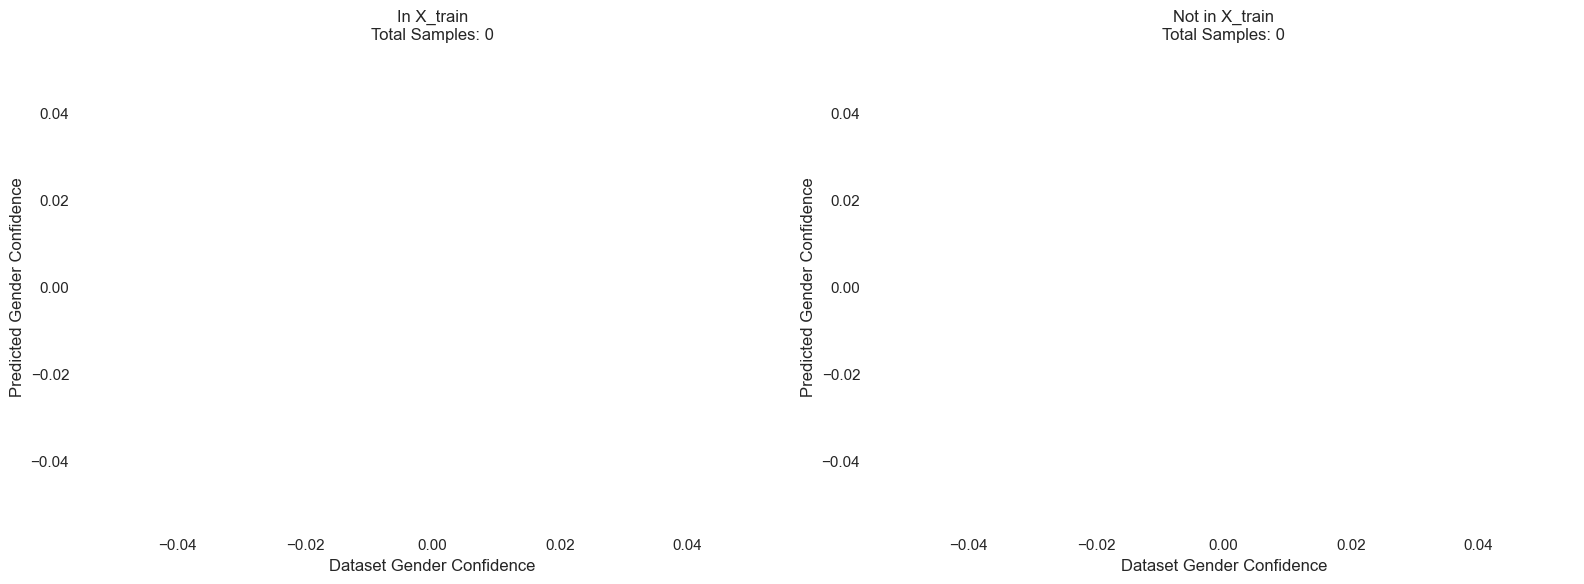

In [20]:
# Edit misclassified_df to include 'in X_train'
misclassified_df["in X_train"] = misclassified_df.index.isin(X_train_lin.index)

# Create subsets for the two plots
df_in_X_train = misclassified_df[misclassified_df["in X_train"]]
df_not_in_X_train = misclassified_df[~misclassified_df["in X_train"]]

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Points in X_train
sns.scatterplot(data=df_in_X_train, x='gender:confidence', y='gender_confidence_pred', alpha=0.4, ax=axes[0], color='blue')
axes[0].plot([df_in_X_train['gender:confidence'].min(), df_in_X_train['gender:confidence'].max()],
             [df_in_X_train['gender:confidence'].min(), df_in_X_train['gender:confidence'].max()], 'k--', lw=2)
axes[0].set_xlabel('Dataset Gender Confidence')
axes[0].set_ylabel('Predicted Gender Confidence')
axes[0].set_title(f'In X_train\nTotal Samples: {len(df_in_X_train)}')

# Plot 2: Points not in X_train
sns.scatterplot(data=df_not_in_X_train, x='gender:confidence', y='gender_confidence_pred', alpha=0.4, ax=axes[1], color='red')
axes[1].plot([df_not_in_X_train['gender:confidence'].min(), df_not_in_X_train['gender:confidence'].max()],
             [df_not_in_X_train['gender:confidence'].min(), df_not_in_X_train['gender:confidence'].max()], 'k--', lw=2)
axes[1].set_xlabel('Dataset Gender Confidence')
axes[1].set_ylabel('Predicted Gender Confidence')
axes[1].set_title(f'Not in X_train\nTotal Samples: {len(df_not_in_X_train)}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

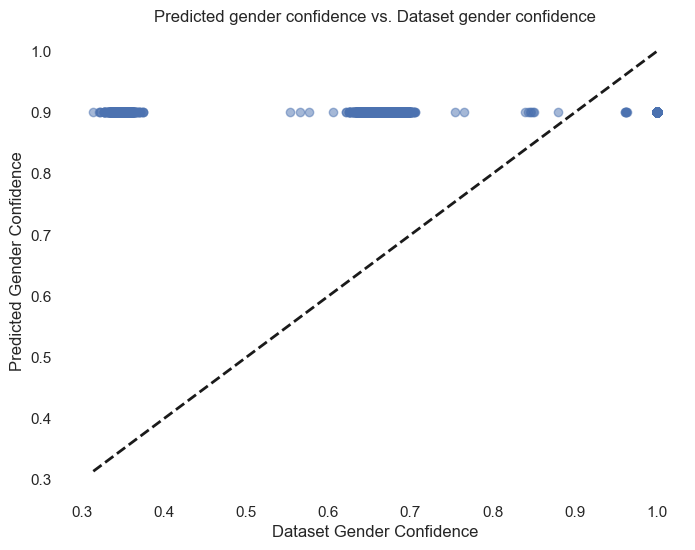

In [35]:
#Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(y.to_numpy(), y_lin_tot_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Dataset Gender Confidence')
plt.ylabel('Predicted Gender Confidence')
plt.title('Predicted gender confidence vs. Dataset gender confidence')
plt.show()

## Without text features

In [ ]:
X_train_lin = sm.add_constant(X_train)
X_test_lin = sm.add_constant(X_test)
df_preprocessed_lin = sm.add_constant(df_preprocessed)

model = sm.OLS(y_train, X_train_lin)  # Ordinary least squares (unregularized)
results = model.fit()

#run predictions
y_lin_pred = results.predict(X_test_lin)
y_lin_tot_pred = results.predict(df_preprocessed_lin)

# Evaluate performance using Mean Squared Error
mse = mean_squared_error(y_test, y_lin_pred)
print(f"Mean Squared Error: {mse}")

mse = mean_squared_error(y, y_lin_tot_pred)
print(f"Mean Squared Error: {mse}")